In [2]:
import torch
from example_models import MNIST_model, CIFAR_model, show_image, show_mei
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

import sys
sys.path.append('..')

# Build and train your models

In [3]:
model = MNIST_model #CIFAR_model

model1 = model(name="model1", device=device)
model2 = model(name="model2", device=device)

model1.train(epochs=10)
model2.train(epochs=10)
model1.eval()
model2.eval()

100%|██████████| 9912422/9912422 [00:03<00:00, 2741105.62it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 1285313.90it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 1880977.97it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 8141251.61it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



AttributeError: 'MNIST_model' object has no attribute 'device'

# Import and instantiate MEI

In [6]:
import src.mei as mei
Mei = mei.MEI(models=[model1, model2])

# Generate *most exciting input*

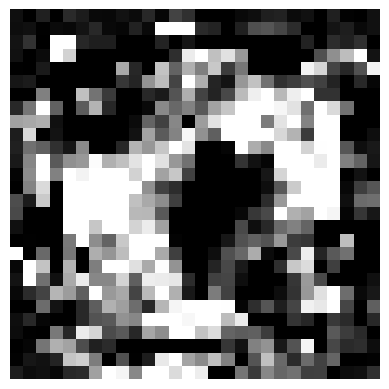

Activation:  1.0


In [12]:
meip = Mei.generate([0])
show_mei(meip)

# Generate gradient receptive field

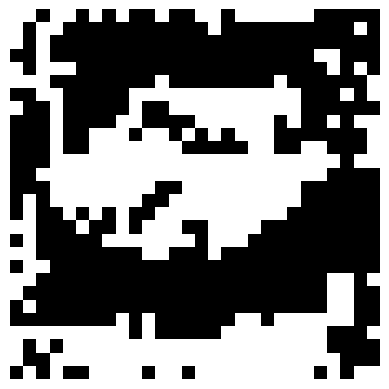

Activation:  1.0


In [9]:
gradrf = Mei.gradient_rf([9])
show_mei(gradrf)

# Find most excitatory samples from dataset

In [ ]:
meip_best_match = meip.best_match(model1.train_loader)

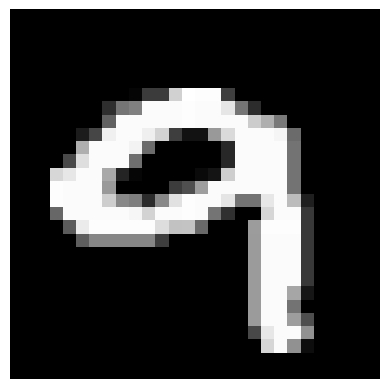

In [21]:
show_image(meip_best_match[1][0][0])

# Compare original and *masked/jittered/shifted* responses

In [10]:
images = [meip_best_match[1][0][0]]

In [13]:
orig_resps, masked_resps, masked_images = meip.masked_responses(images)
print("original response: ", orig_resps)
print("masked response: ", masked_resps)
for i in images:
    show_image(masked_images)

100%|██████████| 1/1 [00:00<00:00, 619.54it/s]

original response:  [3.7855802e-11]
masked response:  [5.058802e-09]


# Create Gabor stimuli and find most excitatory ones

In [ ]:
gabor = mei.Gabor(models=[model1, model2])
best_gabor = gabor.best_gabor() #configban a grid search
show_mei(best_gabor)

# Find optimal Gabor stimuli

In [ ]:
optimal_gabor = gabor.optimal_gabor()
show_mei(optimal_gabor)

# Compute spatial frequency

In [ ]:
freq_cols_best_gabor, freq_rows_best_gabor, magnitude_spectrum_best_gabor = best_gabor.spatial_frequency()

freq_cols_optimal_gabor, freq_rows_optimal_gabor, magnitude_spectrum_optimal_gabor = optimal_gabor.spatial_frequency()

freq_cols_mei, freq_rows_mei, magnitude_spectrum_mei = meip.spatial_frequency()

# Dev tools

In [62]:
import importlib
importlib.reload(mei)

<module 'src.mei' from '/Users/laszlofreund/code/ai/mei/torch/mei/src/mei.py'>